In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

sns.set_style('ticks')

In [23]:
dynData = loadmat('./Data/Dynamcs.mat')

In [24]:
cir_on = dynData['cir_on']
cir_off = dynData['cir_off']
tspan = dynData['tspan'].flatten() / 24

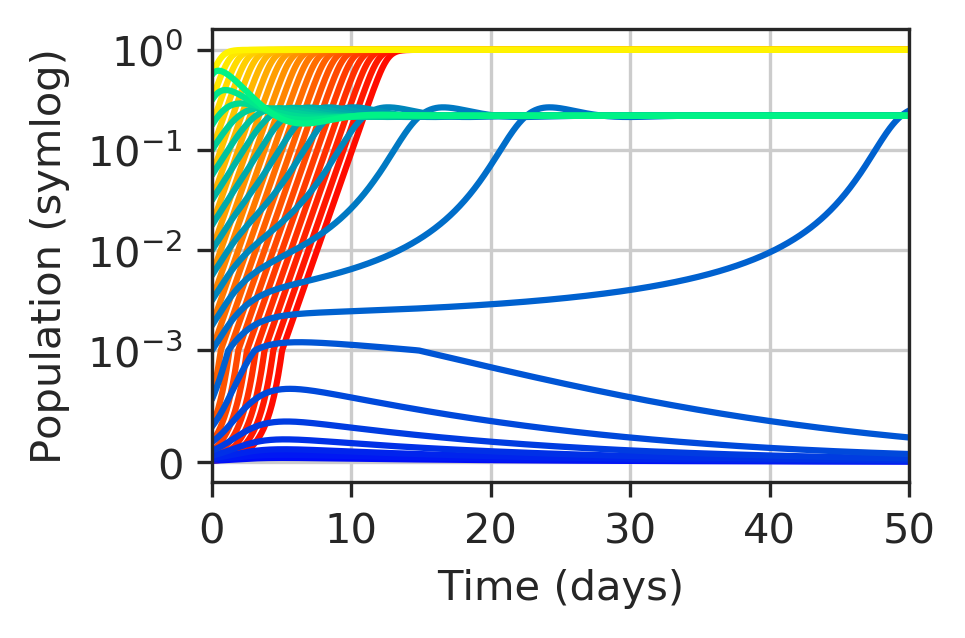

In [25]:
traceN = cir_on.shape[1]
bPalette = sns.color_palette('winter', traceN)
rPalette = sns.color_palette('autumn', traceN)


fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 300

for idx in range(traceN):
    ax.plot(tspan, cir_off[:, idx], color=rPalette[idx])
    ax.plot(tspan, cir_on[:, idx], color=bPalette[idx])

ax.set_yscale('symlog', linthreshy=0.001)
ax.set_xlim([0, 50])
ax.set_ylabel('Population (symlog)')
ax.set_xlabel('Time (days)')
ax.grid(True, which='both')

fig.savefig('./ExportedFigs/Dynmaics.svg')

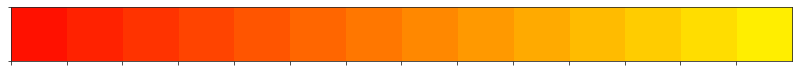

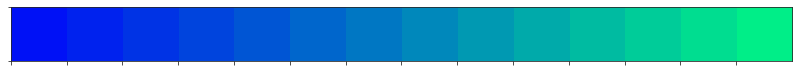

In [78]:
sns.palplot(rPalette)
plt.savefig('./ExportedFigs/DynLgd1.svg')
sns.palplot(bPalette)   
plt.savefig('./ExportedFigs/DynLgd2.svg')

In [19]:
traceN

23

In [73]:
fig.axes

[]

In [7]:
cir_on.shape

(14000, 1)